In [192]:
import keras
import numpy as np
import pandas as pd 
import tensorflow as tf
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

Loading and preparing the data

In [193]:
x_uni = np.load("data_ready/data_ready/data_ready/input_windows_uni_C.npy")
y_uni = np.load("data_ready/data_ready/data_ready/output_windows_uni_notstandardized.npy")

In [194]:
x_multi = np.load("FINAL_input_windows_multi/FINAL_input_windows_multi/input_windows_multi_C.npy")
y_multi = np.load("data_ready/data_ready/data_ready/output_windows_multi_notstandardized.npy")

In [200]:
# Train test split uni
x_train_uni = x_uni[:66813]
x_test_uni = x_uni[66813:]
print(x_train_uni.shape)
print(x_test_uni.shape)
print()
y_train_uni = y_uni[:66813]
y_test_uni = y_uni[66813:]
print(y_train_uni.shape)
print(y_test_uni.shape)

(66813, 10)
(16703, 10)

(66813, 10)
(16703, 10)


In [201]:
# reshape the univariate data to 3 dimensional
x_train_uni = np.reshape(x_train_uni, (x_train_uni.shape[0], x_train_uni.shape[1], 1))
x_test_uni = np.reshape(x_test_uni, (x_test_uni.shape[0], x_test_uni.shape[1], 1))
print(x_train_uni.shape)
print(x_test_uni.shape)
y_train_uni = np.reshape(y_train_uni, (y_train_uni.shape[0], y_train_uni.shape[1], 1))
y_test_uni = np.reshape(y_test_uni, (y_test_uni.shape[0], y_test_uni.shape[1], 1))
print(y_train_uni.shape)
print(y_test_uni.shape)

(66813, 10, 1)
(16703, 10, 1)
(66813, 10, 1)
(16703, 10, 1)


In [202]:
# Train test split multi
x_train_multi = x_multi[:66813]
x_test_multi = x_multi[66813:]
print(x_train_multi.shape)
print(x_test_multi.shape)
print()
y_train_multi = y_multi[:66813]
y_test_multi = y_multi[66813:]
print(y_train_multi.shape)
print(y_test_multi.shape)

(66813, 10, 83)
(16703, 10, 83)

(66813, 10)
(16703, 10)


In [203]:
# reshape the multivariate data to 3 dimensional
y_train_multi = np.reshape(y_train_multi, (y_train_multi.shape[0], y_train_multi.shape[1], 1))
y_test_multi = np.reshape(y_test_multi, (y_test_multi.shape[0], y_test_multi.shape[1], 1))
print(y_train_multi.shape)
print(y_test_multi.shape)

(66813, 10, 1)
(16703, 10, 1)


In [204]:
# set type multi windows to float
x_train_multi = x_train_multi.astype(float)
x_test_multi = x_test_multi.astype(float)
y_train_multi = y_train_multi.astype(float)
y_test_multi = y_test_multi.astype(float)

Select variables

In [371]:
print(x_train_multi.shape)

(66813, 10, 83)


In [372]:
# select variables for x_multi
x_train_multi = x_train_multi[:,:,0]
x_train_multi = np.reshape(x_train_multi, (x_train_multi.shape[0], x_train_multi.shape[1], 1))
x_test_multi = x_test_multi[:,:,0]
x_test_multi = np.reshape(x_test_multi, (x_test_multi.shape[0], x_test_multi.shape[1], 1))

In [373]:
print(x_train_multi.shape)
print(x_test_multi.shape)

(66813, 10, 1)
(16703, 10, 1)


Try 1

In [ ]:
# Try 1: Laptime + Trackstatus
selected_variables = [0,76,77,78,79,80,81,82]

x_train_multi = x_train_multi[:,:,selected_variables]
x_train_multi = np.reshape(x_train_multi, (x_train_multi.shape[0], x_train_multi.shape[1], len(selected_variables)))
x_test_multi = x_test_multi[:,:,selected_variables]
x_test_multi = np.reshape(x_test_multi, (x_test_multi.shape[0], x_test_multi.shape[1], len(selected_variables)))

In [81]:
print(x_train_multi.shape)
print(x_test_multi.shape)

(66813, 10, 8)
(16703, 10, 8)


Try 2

In [14]:
# Try 2: Laptime + Trackstatus + position
selected_variables = [0,3,76,77,78,79,80,81,82]

x_train_multi = x_train_multi[:,:,selected_variables]
x_train_multi = np.reshape(x_train_multi, (x_train_multi.shape[0], x_train_multi.shape[1], len(selected_variables)))
x_test_multi = x_test_multi[:,:,selected_variables]
x_test_multi = np.reshape(x_test_multi, (x_test_multi.shape[0], x_test_multi.shape[1], len(selected_variables)))

In [15]:
print(x_train_multi.shape)
print(x_test_multi.shape)

(66813, 10, 9)
(16703, 10, 9)


Try 3

In [119]:
# Try 3: Laptime + Trackstatus + position + Lap
selected_variables = [0,3,74,75,76,77,78,79,80,81,82]

x_train_multi = x_train_multi[:,:,selected_variables]
x_train_multi = np.reshape(x_train_multi, (x_train_multi.shape[0], x_train_multi.shape[1], len(selected_variables)))
x_test_multi = x_test_multi[:,:,selected_variables]
x_test_multi = np.reshape(x_test_multi, (x_test_multi.shape[0], x_test_multi.shape[1], len(selected_variables)))

In [120]:
print(x_train_multi.shape)
print(x_test_multi.shape)

(66813, 10, 11)
(16703, 10, 11)


Try 4

In [138]:
# Try 4: Laptime + Trackstatus + position + Lap + Tyrelife
selected_variables = [0,2,3,74,75,76,77,78,79,80,81,82]

x_train_multi = x_train_multi[:,:,selected_variables]
x_train_multi = np.reshape(x_train_multi, (x_train_multi.shape[0], x_train_multi.shape[1], len(selected_variables)))
x_test_multi = x_test_multi[:,:,selected_variables]
x_test_multi = np.reshape(x_test_multi, (x_test_multi.shape[0], x_test_multi.shape[1], len(selected_variables)))

In [139]:
print(x_train_multi.shape)
print(x_test_multi.shape)

(66813, 10, 12)
(16703, 10, 12)


Try 5 - only external factors

In [194]:
# Try 5: External factors: Laptime + Trackstatus + Rainfall + weather variables
selected_variables = [0,72,73,77,78,79,80,81,82]

x_train_multi = x_train_multi[:,:,selected_variables]
x_train_multi = np.reshape(x_train_multi, (x_train_multi.shape[0], x_train_multi.shape[1], len(selected_variables)))
x_test_multi = x_test_multi[:,:,selected_variables]
x_test_multi = np.reshape(x_test_multi, (x_test_multi.shape[0], x_test_multi.shape[1], len(selected_variables)))

In [195]:
print(x_train_multi.shape)
print(x_test_multi.shape)

(66813, 10, 9)
(16703, 10, 9)


# Baseline

In [176]:
def create_baseline(x):
    # Extract the last lap time from each sequence
    last_lap_times = x[:, -1]

    # Replicate the last lap time to predict the entire window
    predicted_baseline = np.repeat(last_lap_times[:, np.newaxis], 10, axis=1)

    return(predicted_baseline)

In [177]:
pred_baseline = create_baseline(x_test_uni)
print(pred_baseline.shape)
np.save("predicted_data/predicted_baseline/pred_baseline", pred_baseline)

(16703, 10, 1)


Test

In [181]:
print(y_test_uni.shape)
print(pred_baseline.shape)
pred_baseline = pred_baseline.reshape(16703,-1)

(16703, 10)
(16703, 10, 1)


In [182]:
# Evaluation metrics

#RMSE
baseline_rmse = mean_squared_error(y_test_uni, pred_baseline)
print(baseline_rmse)

#MAE
baseline_mae = mean_absolute_error(y_test_uni, pred_baseline)
print(baseline_mae)

#MAPE
baseline_mape = mean_absolute_percentage_error(y_test_uni, pred_baseline)
print(baseline_mape)

8360437536.628899
90407.18988977995
1.0000002250785935


# ULSTM and MLSTM

ULSTM

In [15]:
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, Input
from keras.layers import LSTM 

optimizer = Adam(learning_rate=0.001)


model = Sequential()
model.add(Input(shape=(x_train_uni.shape[1], x_train_uni.shape[2])))
model.add(LSTM(64, activation="relu", return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(64, activation = "relu", return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(64, activation = "relu", return_sequences=True))
model.add(Dense(1, activation='linear'))  # Adjust output shape to (None, 10) and set activation to linear

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10, 1)          │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,009 (324.25 KB)

 Trainable params: 83,009 (324.25 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mse','mae','mape'])

In [18]:
history = model.fit(x_train_uni, y_train_uni, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 56s 27ms/step - loss: 4613937152.0000 - mae: 56513.6875 - mape: 63.1790 - mse: 4613937664.0000 - val_loss: 1387058176.0000 - val_mae: 20978.8633 - val_mape: 23.0635 - val_mse: 1387058176.0000
Epoch 2/10
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - loss: 1106020864.0000 - mae: 17626.3008 - mape: 19.4880 - mse: 1106020992.0000 - val_loss: 734484352.0000 - val_mae: 13981.5703 - val_mape: 15.2650 - val_mse: 734484352.0000
Epoch 3/10
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - loss: 553483136.0000 - mae: 11201.3096 - mape: 12.3277 - mse: 553483136.0000 - val_loss: 124588808.0000 - val_mae: 7229.7402 - val_mape: 7.6726 - val_mse: 124588808.0000
Epoch 4/10
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - loss: 77913920.0000 - mae: 4962.3389 - mape: 5.3504 - mse: 77913920.0000 - val_loss: 116004304.0000 - val_mae: 5522.3096 - val_mape: 5.5275 - val_mse: 116004304.0000
Epoch 5/10
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 53s 32ms/step - loss: 69758480.0000 - ma

In [185]:
test_loss, test_mse, test_mae, test_mape = model.evaluate(x_test_uni, y_test_uni)

print("Test Loss:", test_loss)
print("Test MSE:", test_loss)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)

522/522 [==============================] - 10s 19ms/step - loss: 87433296.0000 - mse: 87433344.0000 - mae: 4699.8423 - mape: 4.7437
Test Loss: 87433296.0
Test MSE: 87433296.0
Test MAE: 4699.84228515625
Test MAPE: 4.743702411651611


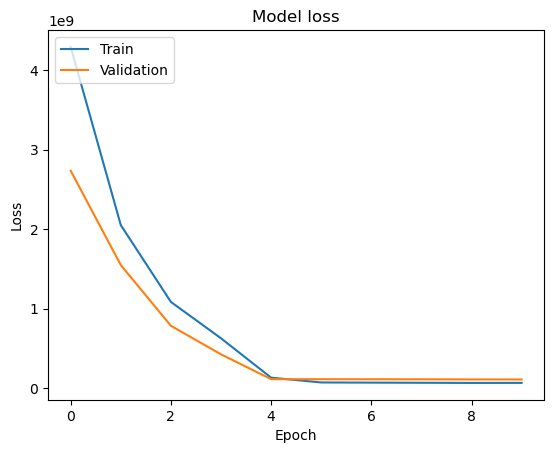

In [64]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [70]:
yhat_uni = model.predict(x_test_uni, verbose=0)

In [75]:
print(yhat_uni.shape)

(16703, 10, 1)


In [79]:
# save ULSTM predictions
np.save("predicted_data/predicted_LSTm/pred_ulstm",yhat_uni)

MLSTM

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout
from keras.layers import LSTM 

optimizer = Adam(lr=0.001)


model_mlstm = Sequential()
model_mlstm.add(LSTM(64, input_shape = (x_train_multi.shape[1], x_train_multi.shape[2]), activation="relu", return_sequences=True))
# model_mlstm.add(Dropout(0.2))
model_mlstm.add(LSTM(64, activation = "relu", return_sequences=True))
# model_mlstm.add(Dropout(0.2))
model_mlstm.add(LSTM(64, activation = "relu", return_sequences=True))
model_mlstm.add(Dense(1, activation='linear'))  # Adjust output shape to (None, 10) and set activation to linear

In [214]:
model_mlstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 10, 64)            18944     
                                                                 
 lstm_25 (LSTM)              (None, 10, 64)            33024     
                                                                 
 lstm_26 (LSTM)              (None, 10, 64)            33024     
                                                                 
 dense_8 (Dense)             (None, 10, 1)             65        
                                                                 
Total params: 85,057
Trainable params: 85,057
Non-trainable params: 0
_________________________________________________________________


In [215]:
model_mlstm.compile(loss = 'mse', optimizer = optimizer, metrics = ['mse','mae','mape'])

In [216]:
history_mlstm = model_mlstm.fit(x_train_multi, y_train_multi, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1671/1671 [==============================] - 47s 26ms/step - loss: 3131304704.0000 - mse: 3131306752.0000 - mae: 41067.1562 - mape: 45.7707 - val_loss: 1724385152.0000 - val_mse: 1724386304.0000 - val_mae: 26087.3789 - val_mape: 28.8531
Epoch 2/10
1671/1671 [==============================] - 38s 23ms/step - loss: 1189375872.0000 - mse: 1189374592.0000 - mae: 19321.5312 - mape: 21.3920 - val_loss: 802192128.0000 - val_mse: 802192320.0000 - val_mae: 14387.2285 - val_mape: 15.6868
Epoch 3/10
1671/1671 [==============================] - 37s 22ms/step - loss: 663053952.0000 - mse: 663053248.0000 - mae: 11824.0000 - mape: 12.9892 - val_loss: 531394400.0000 - val_mse: 531394432.0000 - val_mae: 12471.6182 - val_mape: 13.5616
Epoch 4/10
1671/1671 [==============================] - 38s 23ms/step - loss: 217854224.0000 - mse: 217854000.0000 - mae: 7771.4395 - mape: 8.4746 - val_loss: 97764688.0000 - val_mse: 97764688.0000 - val_mae: 5401.3223 - val_mape: 5.5725
Epoch 5/10
1671/1671 [==

In [217]:
test_loss_mlstm, test_mse_mlstm, test_mae_mlstm, test_mape_mlstm = model_mlstm.evaluate(x_test_multi, y_test_multi)

print("Test Loss:", test_loss_mlstm)
print("Test MSE:", test_loss_mlstm)
print("Test MAE:", test_mae_mlstm)
print("Test MAPE:", test_mape_mlstm)

522/522 [==============================] - 5s 9ms/step - loss: 80647712.0000 - mse: 80647768.0000 - mae: 3958.3113 - mape: 3.8635
Test Loss: 80647712.0
Test MSE: 80647712.0
Test MAE: 3958.311279296875
Test MAPE: 3.863460063934326


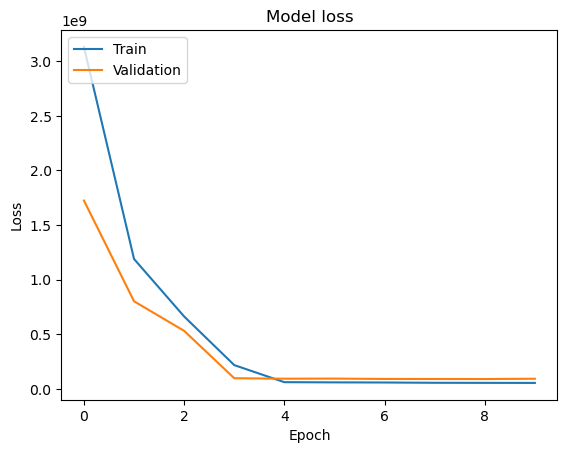

In [218]:
# Plot training & validation loss values
plt.plot(history_mlstm.history['loss'])
plt.plot(history_mlstm.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [219]:
yhat_mlstm = model_mlstm.predict(x_test_multi, verbose=0)

In [220]:
print(yhat_mlstm.shape)

(16703, 10, 1)


In [221]:
# save ULSTM predictions
np.save("predicted_data/predicted_MLSTM/pred_mlstm", yhat_mlstm)

# LSTM-FCN and MLSTM-FCN

LSTM-FCN

In [46]:
from keras import backend as K
from keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Permute, Dropout, Flatten, Reshape
from keras.layers import Input, Dense, LSTM, concatenate, Activation, GRU, SimpleRNN
from keras.models import Model
from keras.optimizers import Adam

In [545]:
# reshape training and test data
x_train_uni = x_train_uni.reshape(-1, 1, 10)
y_train_uni = y_train_uni.reshape(-1, 1, 10)

x_test_uni = x_test_uni.reshape(-1, 1, 10)
y_test_uni = y_test_uni.reshape(-1, 1, 10)

In [546]:
ip = Input(shape=(1, 10))

x = LSTM(64, activation="relu", return_sequences=True)(ip)
x = Dropout(0.2)(x)

y = Permute((2, 1))(ip)
y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform')(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)

y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform')(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)

y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform')(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)

y = GlobalAveragePooling1D()(y)
y = Reshape((1, 128))(y)  # Reshape y to have the same shape as x along the concatenation axis

x = concatenate([x, y])

out = Dense(10, activation='linear')(x) #Hier heb ik wellicht per ongeluk iets verandert

model_LSTMFCN = Model(ip, out)

In [547]:
model_LSTMFCN.summary()

Model: "model_36"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_52 (InputLayer)          [(None, 1, 10)]      0           []                               
                                                                                                  
 permute_51 (Permute)           (None, 10, 1)        0           ['input_52[0][0]']               
                                                                                                  
 conv1d_151 (Conv1D)            (None, 10, 128)      1152        ['permute_51[0][0]']             
                                                                                                  
 batch_normalization_151 (Batch  (None, 10, 128)     512         ['conv1d_151[0][0]']             
 Normalization)                                                                            

 reshape_96 (Reshape)           (None, 1, 128)       0           ['global_average_pooling1d_128[0]
                                                                 [0]']                            
                                                                                                  
 concatenate_49 (Concatenate)   (None, 1, 192)       0           ['dropout_50[0][0]',             
                                                                  'reshape_96[0][0]']             
                                                                                                  
 dense_201 (Dense)              (None, 1, 10)        1930        ['concatenate_49[0][0]']         
                                                                                                  
Total params: 286,858
Trainable params: 285,834
Non-trainable params: 1,024
__________________________________________________________________________________________________


In [198]:
optimizer = Adam(learning_rate=0.001)
model_LSTMFCN.compile(loss = 'mse', optimizer = optimizer, metrics = ['mse','mae','mape'])

In [127]:
history_LSTMFCN = model_LSTMFCN.fit(x_train_uni, y_train_uni, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1671/1671 [==============================] - 27s 15ms/step - loss: 8010769920.0000 - mse: 8010769920.0000 - mae: 88458.0625 - mape: 98.8839 - val_loss: 7706800640.0000 - val_mse: 7706800640.0000 - val_mae: 86577.1016 - val_mape: 97.0352
Epoch 2/20
1671/1671 [==============================] - 25s 15ms/step - loss: 7174625792.0000 - mse: 7174625792.0000 - mae: 83587.3516 - mape: 93.3132 - val_loss: 6730445824.0000 - val_mse: 6730445824.0000 - val_mae: 80742.2656 - val_mape: 90.3415
Epoch 3/20
1671/1671 [==============================] - 26s 15ms/step - loss: 5916943872.0000 - mse: 5916943872.0000 - mae: 75619.8203 - mape: 84.1875 - val_loss: 5308390400.0000 - val_mse: 5308390400.0000 - val_mae: 71396.9219 - val_mape: 79.6822
Epoch 4/20
1671/1671 [==============================] - 26s 16ms/step - loss: 4497257472.0000 - mse: 4497257472.0000 - mae: 65383.5273 - mape: 72.4683 - val_loss: 3969209856.0000 - val_mse: 3969209856.0000 - val_mae: 61113.4961 - val_mape: 67.8647
Epoch 5/

In [128]:
test_loss_LSTMFCN, test_mse_LSTMFCN, test_mae_LSTMFCN, test_mape_LSTMFCN = model_LSTMFCN.evaluate(x_test_uni, y_test_uni)

print("Test Loss:", test_loss_LSTMFCN)
print("Test MSE:", test_loss_LSTMFCN)
print("Test MAE:", test_mae_LSTMFCN)
print("Test MAPE:", test_mape_LSTMFCN)

522/522 [==============================] - 3s 6ms/step - loss: 84052680.0000 - mse: 84052680.0000 - mae: 4005.9138 - mape: 3.8778
Test Loss: 84052680.0
Test MSE: 84052680.0
Test MAE: 4005.913818359375
Test MAPE: 3.877842426300049


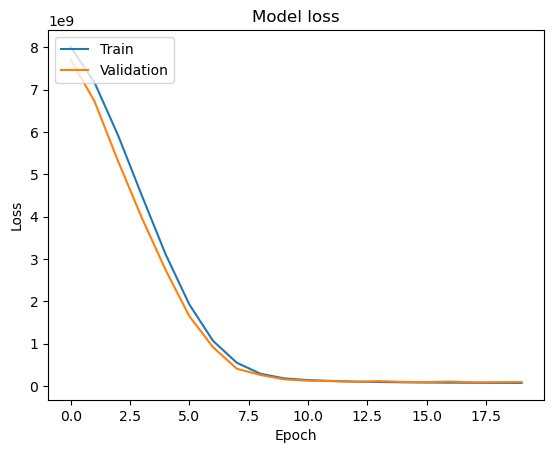

In [129]:
# Plot training & validation loss values
plt.plot(history_LSTMFCN.history['loss'])
plt.plot(history_LSTMFCN.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [130]:
yhat_LSTMFCN = model_LSTMFCN.predict(x_test_uni, verbose=0)

In [131]:
# Reshape back to (-1, 10, 1)
x_test_uni = x_test_uni.reshape(16703, 10, 1)
y_test_uni = y_test_uni.reshape(16703, 10, 1)
yhat_LSTMFCN = yhat_LSTMFCN.reshape(16703, 10, 1)

In [132]:
# save predictions
np.save("predicted_data/predicted_LSTMFCN/pred_LSTMFCN", yhat_LSTMFCN)

MLSTM-FCN

In [577]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, multiply, concatenate, Activation, Masking, Reshape, RepeatVector, TimeDistributed
from keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Permute, Dropout
from keras import backend as K
from keras.optimizers import Adam

In [578]:
def squeeze_excite_block(inputt):
    ''' Create a squeeze-excite block
    Args:
        input: input tensor
        filters: number of output filters
        k: width factor

    Returns: a keras tensor
    '''
    filters = K.int_shape(inputt)[-1] # channel_axis = -1 for TF

    se = GlobalAveragePooling1D()(inputt)
    se = Reshape((1, filters))(se)
    se = Dense(filters // 16,  activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    se = multiply([inputt, se])
    return se

In [579]:
# reshape training and test data
x_train_multi = x_train_multi.reshape(-1, 9, 10)
y_train_multi = y_train_multi.reshape(-1, 1, 10)

x_test_multi = x_test_multi.reshape(-1, 9, 10)
y_test_multi = y_test_multi.reshape(-1, 1, 10)

In [580]:
print(x_train_multi.shape)
print(x_test_multi.shape)

(66813, 9, 10)
(16703, 9, 10)


In [581]:
print(y_train_multi.shape)
print(y_test_multi.shape)

(66813, 1, 10)
(16703, 1, 10)


In [582]:
ip = Input(shape=(x_train_multi.shape[1], 10))

x = Masking()(ip)
x = LSTM(128, activation="relu", return_sequences=True)(x)
x = Dropout(0.2)(x)

y = Permute((2, 1))(ip)
y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform', groups=1)(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)
y = squeeze_excite_block(y)

y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform', groups=1)(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)
y = squeeze_excite_block(y)

y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform', groups=1)(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)

y = GlobalAveragePooling1D()(y)
y = RepeatVector(x.shape[1])(y)  # Repeat y to match the time dimension of x

x = concatenate([x, y])

out = Dense(10, activation='linear')(x)


model_MLSTMFCN = Model(ip, out)

In [583]:
model_MLSTMFCN.summary()

Model: "model_39"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_55 (InputLayer)          [(None, 9, 10)]      0           []                               
                                                                                                  
 permute_54 (Permute)           (None, 10, 9)        0           ['input_55[0][0]']               
                                                                                                  
 conv1d_160 (Conv1D)            (None, 10, 128)      9344        ['permute_54[0][0]']             
                                                                                                  
 batch_normalization_160 (Batch  (None, 10, 128)     512         ['conv1d_160[0][0]']             
 Normalization)                                                                            

In [584]:
optimizer = Adam(learning_rate=0.001)
model_MLSTMFCN.compile(loss = 'mse', optimizer = optimizer, metrics = ['mse','mae','mape'])

In [585]:
history_MLSTMFCN = model_MLSTMFCN.fit(x_train_multi, y_train_multi, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1671/1671 [==============================] - 118s 57ms/step - loss: 4396897792.0000 - mse: 4396896768.0000 - mae: 54232.9688 - mape: 60.5724 - val_loss: 2684071424.0000 - val_mse: 2684070912.0000 - val_mae: 35330.4141 - val_mape: 39.2534
Epoch 2/20
1671/1671 [==============================] - 90s 54ms/step - loss: 2273037056.0000 - mse: 2273037312.0000 - mae: 31262.0039 - mape: 34.8303 - val_loss: 1861607808.0000 - val_mse: 1861608960.0000 - val_mae: 26301.3652 - val_mape: 29.1173
Epoch 3/20
1671/1671 [==============================] - 94s 56ms/step - loss: 1662005888.0000 - mse: 1662008192.0000 - mae: 24897.1973 - mape: 27.7213 - val_loss: 1537981568.0000 - val_mse: 1537981824.0000 - val_mae: 22023.6074 - val_mape: 24.3720
Epoch 4/20
1671/1671 [==============================] - 90s 54ms/step - loss: 1448768896.0000 - mse: 1448768896.0000 - mae: 22338.4180 - mape: 24.8642 - val_loss: 1344941824.0000 - val_mse: 1344941696.0000 - val_mae: 20399.6680 - val_mape: 22.4856
Epoch 5

In [586]:
test_loss_MLSTMFCN, test_mse_MLSTMFCN, test_mae_MLSTMFCN, test_mape_MLSTMFCN = model_MLSTMFCN.evaluate(x_test_multi, y_test_multi)

print("Test Loss:", test_loss_MLSTMFCN)
print("Test MSE:", test_loss_MLSTMFCN)
print("Test MAE:", test_mae_MLSTMFCN)
print("Test MAPE:", test_mape_MLSTMFCN)

522/522 [==============================] - 8s 16ms/step - loss: 72973672.0000 - mse: 72973568.0000 - mae: 3795.2056 - mape: 3.7403
Test Loss: 72973672.0
Test MSE: 72973672.0
Test MAE: 3795.20556640625
Test MAPE: 3.7403111457824707


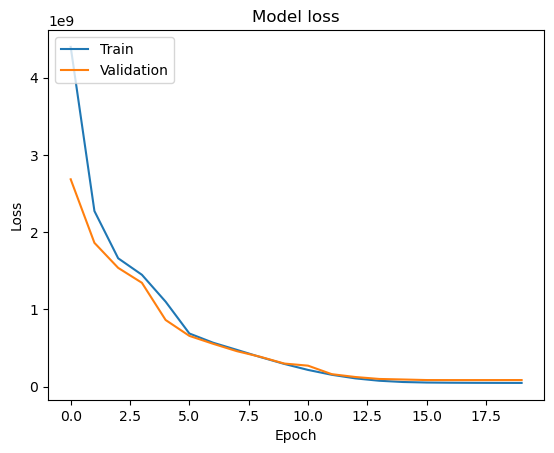

In [587]:
# Plot training & validation loss values
plt.plot(history_MLSTMFCN.history['loss'])
plt.plot(history_MLSTMFCN.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [588]:
yhat_MLSTMFCN = model_MLSTMFCN.predict(x_test_multi, verbose=0)

In [589]:
print(yhat_MLSTMFCN.shape)

(16703, 9, 10)


In [590]:
yhat_MLSTMFCN = yhat_MLSTMFCN[:,0,:]

In [591]:
# Reshape back to (-1, 10, 1)
x_test_multi = x_test_multi.reshape(16703, 10, 9)
y_test_multi = y_test_multi.reshape(16703, 10, 1)
yhat_MLSTMFCN = yhat_MLSTMFCN.reshape(16703, 10, 1)

In [594]:
# save predictions
np.save("predicted_data/predicted_MLSTMFCN/pred_MLSTMFCN", yhat_MLSTMFCN)

# Calculate Metrics

In [205]:
# ULSTM

pred_ulstm = np.load("predicted_data/predicted_LSTm/pred_ulstm.npy")
pred_ulstm = pred_ulstm.reshape(-1,10)
y_test_uni = y_test_uni.reshape(-1, 10)

# RMSE
ulstm_rmse = mean_squared_error(y_test_uni, pred_ulstm)
print(ulstm_rmse)

#MAE
ulstm_mae = mean_absolute_error(y_test_uni, pred_ulstm)
print(ulstm_mae)

#MAPE
ulstm_mape = mean_absolute_percentage_error(y_test_uni, pred_ulstm)
print(ulstm_mape)

91758211.23733403
4684.17705305559
0.04719500371637962


In [206]:
# MLSTM

pred_mlstm = np.load("predicted_data/predicted_MLSTM/pred_mlstm.npy")
pred_mlstm = pred_mlstm.reshape(-1,10)
y_test_uni = y_test_uni.reshape(-1, 10)

# MSE
mlstm_rmse = mean_squared_error(y_test_uni, pred_mlstm)
print(mlstm_rmse)

#MAE
mlstm_mae = mean_absolute_error(y_test_uni, pred_mlstm)
print(mlstm_mae)

#MAPE
mlstm_mape = mean_absolute_percentage_error(y_test_uni, pred_mlstm)
print(mlstm_mape)

80647734.64926118
3958.31152702733
0.03863460271548361


In [207]:
# LSTM FCN

pred_LSTMFCN = np.load("predicted_data/predicted_LSTMFCN/pred_LSTMFCN.npy")
pred_LSTMFCN = pred_LSTMFCN.reshape(-1,10)
y_test_uni = y_test_uni.reshape(-1, 10)

# MSE
LSTMFCN_rmse = mean_squared_error(y_test_uni, pred_LSTMFCN)
print(LSTMFCN_rmse)

#MAE
LSTMFCN_mae = mean_absolute_error(y_test_uni, pred_LSTMFCN)
print(LSTMFCN_mae)

#MAPE
LSTMFCN_mape = mean_absolute_percentage_error(y_test_uni, pred_LSTMFCN)
print(LSTMFCN_mape)

84052706.79913764
4005.9134045904925
0.03877841369039103


In [208]:
# mLSTM FCN

pred_MLSTMFCN = np.load("predicted_data/predicted_MLSTMFCN/pred_MLSTMFCN.npy")
pred_MLSTMFCN = pred_MLSTMFCN.reshape(-1,10)
y_test_uni = y_test_uni.reshape(-1, 10)

# MSE
MLSTMFCN_rmse = mean_squared_error(y_test_uni, pred_MLSTMFCN)
print(MLSTMFCN_rmse)

#MAE
MLSTMFCN_mae = mean_absolute_error(y_test_uni, pred_MLSTMFCN)
print(MLSTMFCN_mae)

#MAPE
MLSTMFCN_mape = mean_absolute_percentage_error(y_test_uni, pred_MLSTMFCN)
print(MLSTMFCN_mape)

77825885.3210855
4104.995853430147
0.0400982681559847


# Predcted vs actual graphs

ULSTM vs MLSTM

In [209]:
y_test_uni = y_test_uni.reshape(-1, 10)
print(y_test_uni.shape)
print(pred_ulstm.shape)
print(pred_mlstm.shape)


(16703, 10)
(16703, 10)
(16703, 10)


In [210]:
# Main seq
actual_seq = []
ulstm_seq = []
mlstm_seq = []

for i in y_test_uni[0:39]:
    actual_seq.append(i[0])

for i in pred_ulstm[0:39]:
    ulstm_seq.append(i[0])

for i in pred_mlstm[0:39]:
    mlstm_seq.append(i[0])

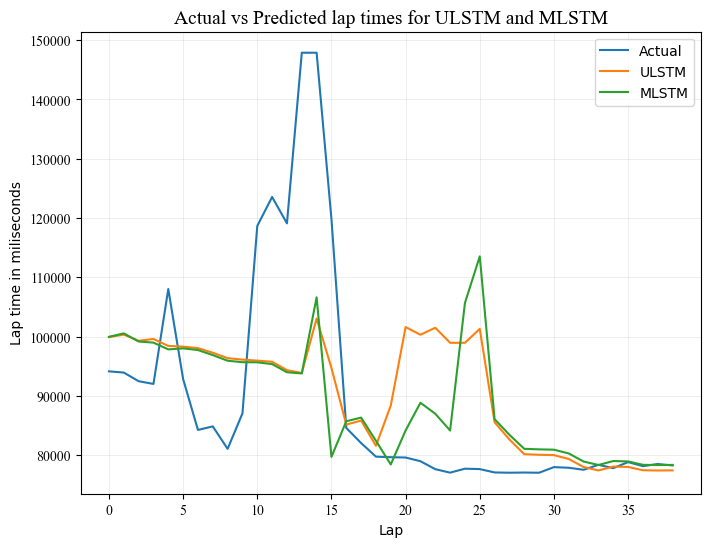

In [211]:
plt.figure(figsize=(8, 6))

# Plotting the actual data
plt.plot(actual_seq, label='Actual')

# Plotting the predictions from model 1
plt.plot(ulstm_seq, label='ULSTM')

# Plotting the predictions from model 2
plt.plot(mlstm_seq, label='MLSTM')

plt.xlabel('Lap')
plt.ylabel('Lap time in miliseconds')
plt.title('Actual vs Predicted lap times for ULSTM and MLSTM', fontname='Times New Roman', fontsize=14)
plt.legend(prop={'family': 'Times New Roman', 'size': 10})  # Setting font for legend
plt.grid(True, alpha=0.3, linewidth=0.5)  # Adjusting grid lines
plt.legend()
plt.grid(True)

# Set font for tick labels
plt.xticks(fontname='Times New Roman', fontsize=10)
plt.yticks(fontname='Times New Roman', fontsize=10)

plt.savefig('graphs/graphlstm.png')

plt.show()

In [212]:
y_test_uni = y_test_uni.reshape(-1, 10)
print(y_test_uni.shape)
print(pred_ulstm.shape)
print(pred_mlstm.shape)

(16703, 10)
(16703, 10)
(16703, 10)


In [220]:
# seq 1
actual_seq_1 = []
ulstm_seq_1 = []
mlstm_seq_1 = []

for i in y_test_uni[475:506]:
    actual_seq_1.append(i[0])

for i in pred_ulstm[475:506]:
    ulstm_seq_1.append(i[0])

for i in pred_mlstm[475:506]:
    mlstm_seq_1.append(i[0])

In [228]:
# seq 2
actual_seq_2 = []
ulstm_seq_2 = []
mlstm_seq_2 = []

for i in y_test_uni[751:801]:
    actual_seq_2.append(i[0])

for i in pred_ulstm[751:801]:
    ulstm_seq_2.append(i[0])

for i in pred_mlstm[751:801]:
    mlstm_seq_2.append(i[0])

In [234]:
# seq 3
actual_seq_3 = []
ulstm_seq_3 = []
mlstm_seq_3 = []

for i in y_test_uni[1001:1051]:
    actual_seq_3.append(i[0])

for i in pred_ulstm[1001:1051]:
    ulstm_seq_3.append(i[0])

for i in pred_mlstm[1001:1051]:
    mlstm_seq_3.append(i[0])

In [240]:
# seq 4
actual_seq_4 = []
ulstm_seq_4 = []
mlstm_seq_4 = []

for i in y_test_uni[1251:1301]:
    actual_seq_4.append(i[0])

for i in pred_ulstm[1251:1301]:
    ulstm_seq_4.append(i[0])

for i in pred_mlstm[1251:1301]:
    mlstm_seq_4.append(i[0])

C:\Users\Fleur\AppData\Local\Temp\ipykernel_11012\2581508150.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontname='Times New Roman')
C:\Users\Fleur\AppData\Local\Temp\ipykernel_11012\2581508150.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontname='Times New Roman')
C:\Users\Fleur\AppData\Local\Temp\ipykernel_11012\2581508150.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontname='Times New Roman')
C:\Users\Fleur\AppData\Local\Temp\ipykernel_11012\2581508150.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabe

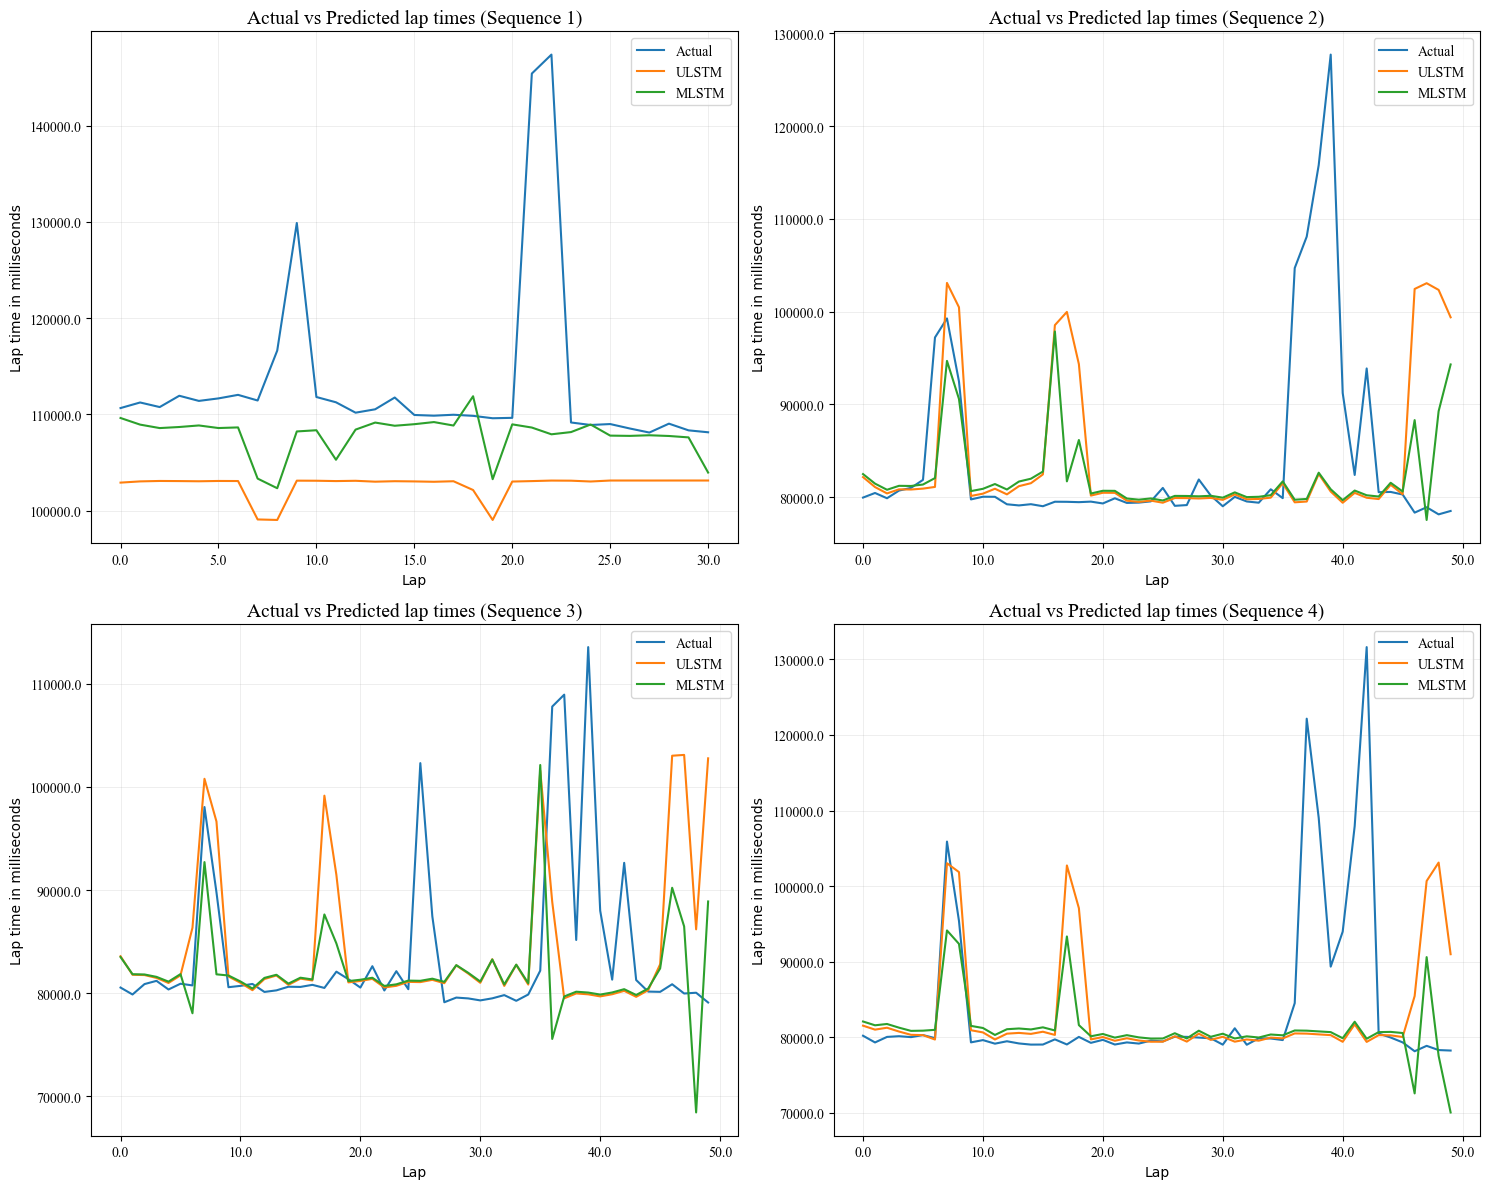

In [242]:
# Grouping sequences into lists
actual_seq_list = [actual_seq_1, actual_seq_2, actual_seq_3, actual_seq_4]
ulstm_seq_list = [ulstm_seq_1, ulstm_seq_2, ulstm_seq_3, ulstm_seq_4]
mlstm_seq_list = [mlstm_seq_1, mlstm_seq_2, mlstm_seq_3, mlstm_seq_4]

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))  # 2x2 grid of subplots

# Plot each sequence in a subplot
for i in range(4):
    ax = axs[i//2, i%2]  # Get the correct subplot
    ax.plot(actual_seq_list[i], label='Actual')
    ax.plot(ulstm_seq_list[i], label='ULSTM')
    ax.plot(mlstm_seq_list[i], label='MLSTM')
    
    ax.set_xlabel('Lap')
    ax.set_ylabel('Lap time in milliseconds')
    ax.set_title(f'Actual vs Predicted lap times (Sequence {i+1})', fontname='Times New Roman', fontsize=14)
    ax.legend(prop={'family': 'Times New Roman', 'size': 10})
    ax.grid(True, alpha=0.3, linewidth=0.5)
    
    # Set font for tick labels
    ax.tick_params(axis='both', which='major', labelsize=10, labelrotation=0)
    ax.set_xticklabels(ax.get_xticks(), fontname='Times New Roman')
    ax.set_yticklabels(ax.get_yticks(), fontname='Times New Roman')

# Adjust layout to prevent overlap
plt.tight_layout()

# # Save the figure
plt.savefig('graphs/graph_lstms.png')

# Show the figure
plt.show()

LSTM-FCN vs MLSTM-FCN

In [189]:
print(y_test_uni.shape)
print(pred_LSTMFCN.shape)
print(pred_MLSTMFCN.shape)

(16703, 10)
(16703, 10)
(16703, 10)


In [190]:
actual_seq = []
lstmfcn_seq = []
mlstmfcn_seq = []

for i in y_test_uni[0:39]:
    actual_seq.append(i[0])

for i in pred_LSTMFCN[0:39]:
    lstmfcn_seq.append(i[0])

for i in pred_MLSTMFCN[0:39]:
    mlstmfcn_seq.append(i[0])

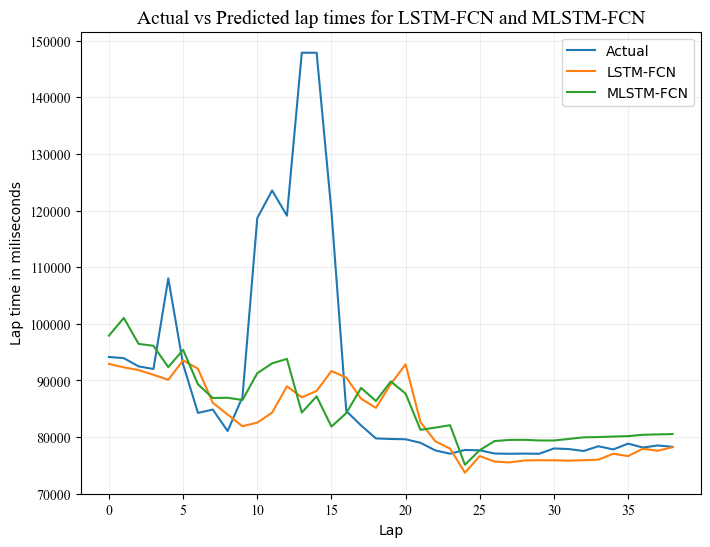

In [191]:
plt.figure(figsize=(8, 6))

# Plotting the actual data
plt.plot(actual_seq, label='Actual')

# Plotting the predictions from model 1
plt.plot(lstmfcn_seq, label='LSTM-FCN')

# Plotting the predictions from model 2
plt.plot(mlstmfcn_seq, label='MLSTM-FCN')

plt.xlabel('Lap')
plt.ylabel('Lap time in miliseconds')

# Set font for tick labels
plt.xticks(fontname='Times New Roman', fontsize=10)
plt.yticks(fontname='Times New Roman', fontsize=10)

plt.title('Actual vs Predicted lap times for LSTM-FCN and MLSTM-FCN', fontname='Times New Roman', fontsize=14)
plt.legend(prop={'family': 'Times New Roman', 'size': 10})  # Setting font for legend
plt.grid(True, alpha=0.3, linewidth=0.5)  # Adjusting grid lines
plt.legend()
plt.grid(True)
plt.savefig('graphs/graphlstmfcn.png')
plt.show()

In [243]:
# seq 1
actual_seq_1 = []
ulstm_seq_1 = []
mlstm_seq_1 = []

for i in y_test_uni[475:506]:
    actual_seq_1.append(i[0])

for i in pred_LSTMFCN[475:506]:
    ulstm_seq_1.append(i[0])

for i in pred_MLSTMFCN[475:506]:
    mlstm_seq_1.append(i[0])

In [244]:
# seq 2
actual_seq_2 = []
ulstm_seq_2 = []
mlstm_seq_2 = []

for i in y_test_uni[751:801]:
    actual_seq_2.append(i[0])

for i in pred_LSTMFCN[751:801]:
    ulstm_seq_2.append(i[0])

for i in pred_MLSTMFCN[751:801]:
    mlstm_seq_2.append(i[0])

In [245]:
# seq 3
actual_seq_3 = []
ulstm_seq_3 = []
mlstm_seq_3 = []

for i in y_test_uni[1001:1051]:
    actual_seq_3.append(i[0])

for i in pred_LSTMFCN[1001:1051]:
    ulstm_seq_3.append(i[0])

for i in pred_MLSTMFCN[1001:1051]:
    mlstm_seq_3.append(i[0])

In [246]:
# seq 4
actual_seq_4 = []
ulstm_seq_4 = []
mlstm_seq_4 = []

for i in y_test_uni[1251:1301]:
    actual_seq_4.append(i[0])

for i in pred_LSTMFCN[1251:1301]:
    ulstm_seq_4.append(i[0])

for i in pred_MLSTMFCN[1251:1301]:
    mlstm_seq_4.append(i[0])

C:\Users\Fleur\AppData\Local\Temp\ipykernel_11012\1927116028.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontname='Times New Roman')
C:\Users\Fleur\AppData\Local\Temp\ipykernel_11012\1927116028.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontname='Times New Roman')
C:\Users\Fleur\AppData\Local\Temp\ipykernel_11012\1927116028.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontname='Times New Roman')
C:\Users\Fleur\AppData\Local\Temp\ipykernel_11012\1927116028.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabe

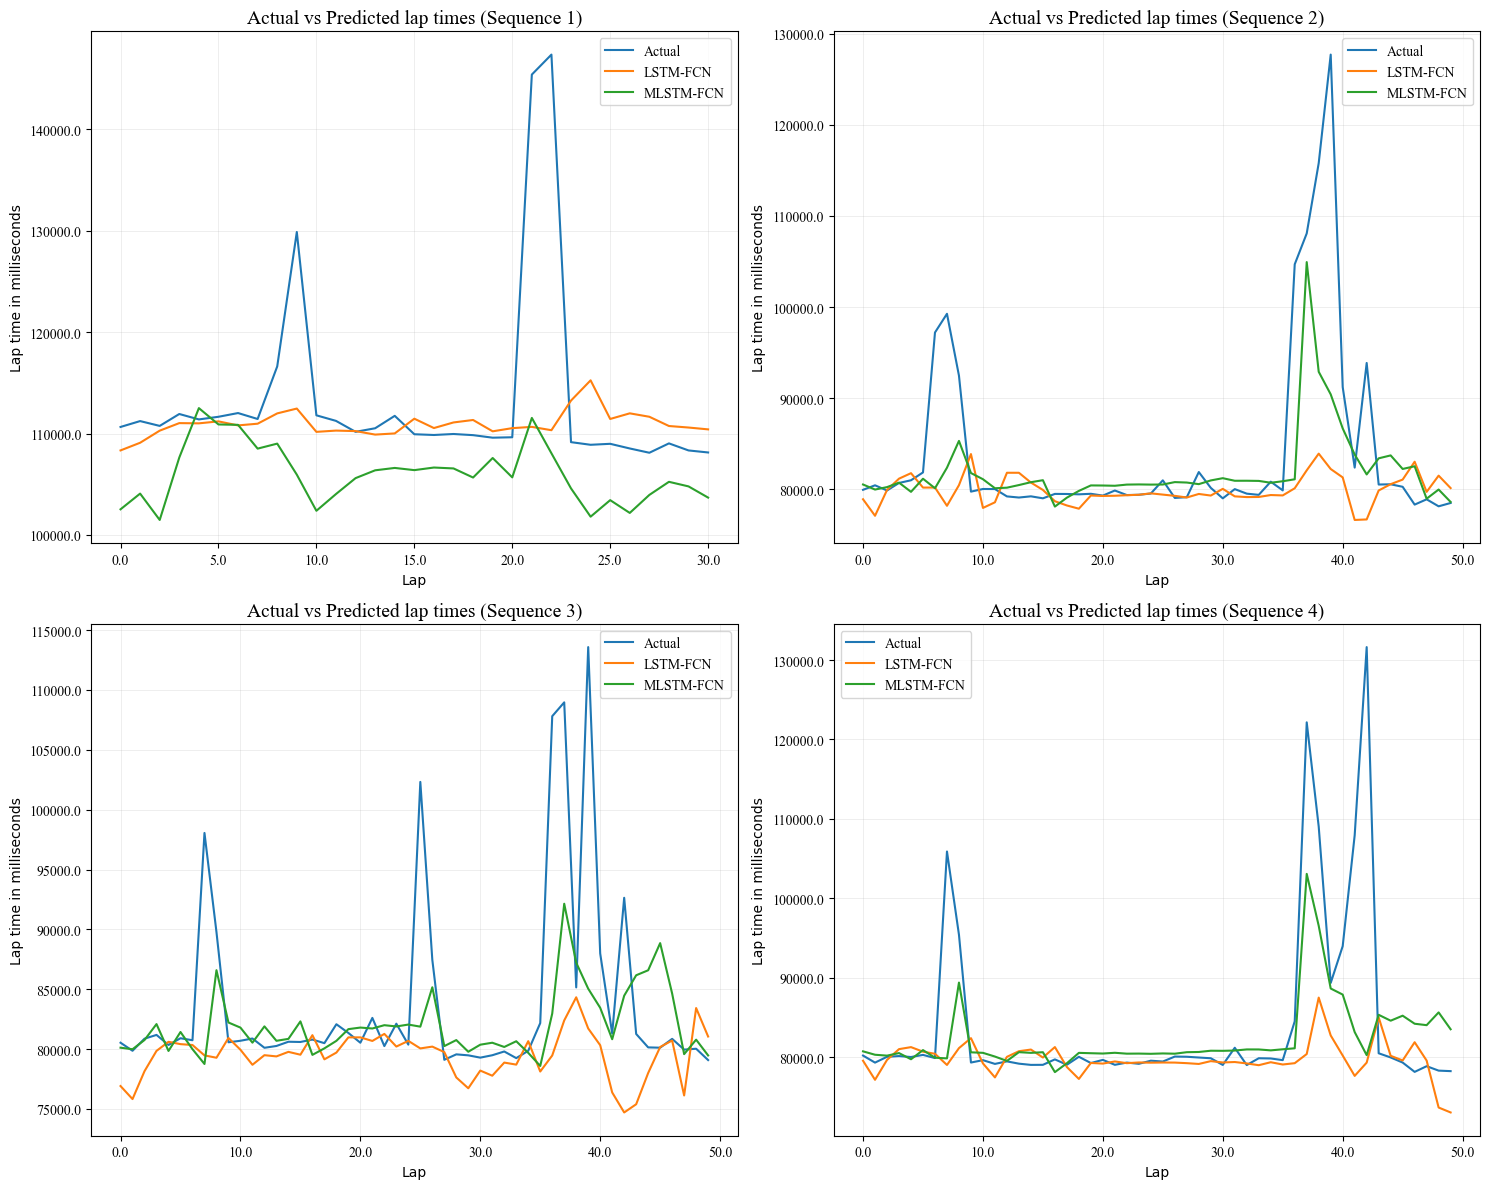

In [247]:
# Grouping sequences into lists
actual_seq_list = [actual_seq_1, actual_seq_2, actual_seq_3, actual_seq_4]
ulstm_seq_list = [ulstm_seq_1, ulstm_seq_2, ulstm_seq_3, ulstm_seq_4]
mlstm_seq_list = [mlstm_seq_1, mlstm_seq_2, mlstm_seq_3, mlstm_seq_4]

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))  # 2x2 grid of subplots

# Plot each sequence in a subplot
for i in range(4):
    ax = axs[i//2, i%2]  # Get the correct subplot
    ax.plot(actual_seq_list[i], label='Actual')
    ax.plot(ulstm_seq_list[i], label='LSTM-FCN')
    ax.plot(mlstm_seq_list[i], label='MLSTM-FCN')
    
    ax.set_xlabel('Lap')
    ax.set_ylabel('Lap time in milliseconds')
    ax.set_title(f'Actual vs Predicted lap times (Sequence {i+1})', fontname='Times New Roman', fontsize=14)
    ax.legend(prop={'family': 'Times New Roman', 'size': 10})
    ax.grid(True, alpha=0.3, linewidth=0.5)
    
    # Set font for tick labels
    ax.tick_params(axis='both', which='major', labelsize=10, labelrotation=0)
    ax.set_xticklabels(ax.get_xticks(), fontname='Times New Roman')
    ax.set_yticklabels(ax.get_yticks(), fontname='Times New Roman')

# Adjust layout to prevent overlap
plt.tight_layout()

# # Save the figure
plt.savefig('graphs/graph_lstmfcns.png')

# Show the figure
plt.show()